# Index - Environmental Health


### 1) Importing the required packages

In [11]:
%run ./functions.ipynb

import pandas as pd
import numpy as np 
import pandas_datareader
from pandas_datareader import wb
from fancyimpute import KNN, SoftImpute, IterativeImputer, BiScaler, NuclearNormMinimization, IterativeSVD  
from sklearn import preprocessing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pmdarima as pm
import typing

### 2) Download the data

In [3]:
area = "Environmental_health" #set the indicator area
area2 = "Environmental Health" 

worldbank_data, tickers = load_the_database(area = area)

In [4]:
#worldbank_data = worldbank_data2.copy()

### 3) Area-specific data transformation

In [5]:
tickers_ = tickers[["Indicator ticker", "Transformation 1", "Transformation 2", "Scaling / Normalisation", "bounds", "symmetric value"]]

#inverse
inverse = tickers[tickers["Transformation 2"] == "inverse"]
inv = worldbank_data.columns[worldbank_data.columns.isin(inverse["Indicator ticker"])]
#worldbank_data[inv] = 1/(worldbank_data[inv] +0.02)
#worldbank_data[inv][worldbank_data > 50] = 50

worldbank_data[inv] = -worldbank_data[inv]


#bounded percentile
bounds_percentile = tickers[tickers["Scaling / Normalisation"] == "bounds_percentile"]
bounds = worldbank_data.columns[worldbank_data.columns.isin(bounds_percentile["Indicator ticker"])]

for col in bounds:
    percentiles = worldbank_data[col].groupby(level = 1).quantile([0.02,0.98]).values
    worldbank_data[col] = np.clip(worldbank_data[col], percentiles[0], percentiles[1])
    
#symmetric

symmetric = tickers[tickers["Scaling / Normalisation"] == "symmetric"]
sym = worldbank_data.columns[worldbank_data.columns.isin(symmetric["Indicator ticker"])]
worldbank_data[sym] = -(1 - worldbank_data[sym]).abs()

#pct change
pctchange = tickers[tickers["Transformation 1"] == "5 year % change"]
pct = worldbank_data.columns[worldbank_data.columns.isin(pctchange["Indicator ticker"])]
#worldbank_data[inv] = 1/(worldbank_data[inv] +0.02)
#worldbank_data[inv][worldbank_data > 50] = 50

worldbank_data[pct] = worldbank_data[pct].groupby(level = 0).pct_change(-5)

pctchange = tickers[tickers["Transformation 1"] == "5 year abs. change"]


#pct change
abschange = tickers[tickers["Transformation 1"] == "5 year abs. change"]
absc = worldbank_data.columns[worldbank_data.columns.isin(abschange["Indicator ticker"])]
#worldbank_data[inv] = 1/(worldbank_data[inv] +0.02)
#worldbank_data[inv][worldbank_data > 50] = 50

worldbank_data[absc] = worldbank_data[absc].groupby(level = 0).diff(-5)

## Check the correlations

In [6]:
import seaborn as sb

corr_matrix = worldbank_data.corr()


#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
               
sol[sol >0.70]

EN.ATM.CO2E.PP.GD     EN.ATM.CO2E.PP.GD.KD    0.965199
EN.ATM.CO2E.PP.GD.KD  EN.ATM.CO2E.KD.GD       0.898396
EN.ATM.CO2E.PP.GD     EN.ATM.CO2E.KD.GD       0.862953
ER.LND.PTLD.ZS        ER.PTD.TOTL.ZS          0.758830
dtype: float64

In [7]:
#remove unnecessary variables to avoid very high correlation
worldbank_data = worldbank_data.drop(["EN.ATM.CO2E.PP.GD", "EN.ATM.CO2E.KD.GD"], axis = 1)

In [8]:
worldbank_data_idx = worldbank_data.copy().reset_index()

### 4) Imputing the missing data


In [9]:
worldbank_data_filled = impute_missing()

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



### 5) Scaling and forecasting the data

In [12]:
worldbank_data_scaled = scale_and_forecast()

worldbank_data_scaled = worldbank_data_scaled.reset_index()
worldbank_data_scaled = worldbank_data_scaled.drop_duplicates(subset=['country', 'year'], keep='last')
worldbank_data_scaled.set_index(["country", "year"], inplace =True )
worldbank_data_scaled = worldbank_data_scaled.where(worldbank_data_scaled < 1, 1)

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. C

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

### 6) Build the index (mean, median, pca...)

In [21]:
#Taking the mean to build our indicator
worldbank_data_scaled["indicator"] = worldbank_data_scaled.mean(axis=1)

#IC1_ = IC1.set_index(["country", "year"])
#IC2_ = IC2.set_index(["country", "year"])

#IC1_["ic1"] = IC1_.mean(axis = 1)
#IC1_ = IC1_[["ic1"]]

#IC2_["ic2"] = IC2_.mean(axis = 1)
#IC2_ = IC2_[["ic2"]]


#worldbank_data_scaled_IC = worldbank_data_scaled.join(IC1_)
#worldbank_data_scaled_IC = worldbank_data_scaled_IC.join(IC2_)

#Or Median
#worldbank_data_scaled["indicator"] = worldbank_data_scaled.median(axis=1)

#Or it can be done by using PCA 

#from sklearn.decomposition import PCA
#pca = PCA(n_components = "mle")
#pca_fit = pca.fit_transform(worldbank_data_scaled)
#expvar = pca.explained_variance_ratio_[np.cumsum(pca.explained_variance_ratio_) < 0.90001]
#leng = len(expvar)
#pca_fit = pd.DataFrame(pca_fit).iloc[:, : leng]
#pca_fit = -pca_fit
#pca_fit = pca_fit*expvar
#indicator = pca_fit.sum(axis = 1)
#indicator = (indicator - indicator.min(axis=0)) / (indicator.max(axis=0) - indicator.min(axis=0))
#
#worldbank_data_scaled.reset_index(inplace = True)
#worldbank_data_scaled["indicator"] = indicator





worldbank_data_scaled.reset_index(inplace = True)
worldbank_data_scaled.year = worldbank_data_scaled.year.astype(int)
merged_data = worldbank_data_scaled
std = pd.DataFrame(merged_data.groupby('country')["indicator"].std())
std = std.rename({'indicator': 'std'}, axis = "columns")
merged_data = pd.merge(merged_data, std, on = "country")
merged_data["ic1"] = (merged_data["indicator"] - merged_data["std"]) - (merged_data["year"]-2019)/100
merged_data["ic2"] =  (merged_data["indicator"] + merged_data["std"]) + (merged_data["year"]-2019)/100
merged_data["ic1"] = np.where(merged_data["year"] > 2019, merged_data["ic1"], "")
merged_data["ic2"] = np.where(merged_data["year"] > 2019, merged_data["ic2"], "")
merged_data[merged_data["year"] == 2019].nlargest(10, 'indicator')

,index,country,year,ER.LND.PTLD.ZS,ER.MRN.PTMR.ZS,ER.PTD.TOTL.ZS,ER.H2O.FWTL.ZS,ER.H2O.FWAG.ZS,ER.H2O.FWDM.ZS,ER.H2O.FWIN.ZS,...,EN.ATM.CO2E.PC,EN.CLC.GHGR.MT.CE,EN.ATM.PM25.MC.M3,EN.ATM.PM25.MC.ZS,EN.ATM.METH.ZG,EN.ATM.NOXE.ZG,indicator,std,ic1,ic2
2380,680,"Hong Kong SAR, China",2019,0.978018,0.972206,0.989027,0.998338,0.822005,0.773775,0.107358,...,0.298273,0.920196,0.999009,0.907758,0.083754,0.916243,84.645279,0.424938,,
3080,880,Kiribati,2019,0.968887,0.962797,0.859865,0.410414,0.988983,0.010011,0.745736,...,0.511453,0.010226,0.889994,0.813803,0.934581,0.065418,84.616645,0.418273,,
5425,1550,Seychelles,2019,0.947071,0.953936,0.674713,0.487625,0.910912,0.035757,0.586567,...,0.484779,0.022498,0.742054,0.830754,0.103112,0.896885,84.590908,0.433854,,
6230,1780,Samoa,2019,0.923296,0.939225,0.535478,0.610188,0.853726,0.088426,0.502047,...,0.475475,0.116583,0.679549,0.836903,0.939859,0.060141,84.577539,0.408776,,
1715,490,"Egypt, Arab Rep.",2019,0.772372,0.607605,0.549529,0.678665,0.553467,0.515926,0.392626,...,0.311257,0.454467,0.618625,0.898410,0.105375,0.894605,84.563611,0.435653,,
4725,1350,Qatar,2019,0.905458,0.507444,0.877252,0.723681,0.497394,0.356217,0.445507,...,0.306551,0.325390,0.637071,0.899949,0.098119,0.901811,84.559681,0.458445,,
525,150,Bahrain,2019,0.787782,0.588517,0.577130,0.676859,0.541191,0.552136,0.400719,...,0.309375,0.473720,0.608618,0.899761,0.093707,0.906249,84.556210,0.459402,,
4970,1420,Singapore,2019,0.879823,0.529666,0.764236,0.717026,0.523762,0.357282,0.424520,...,0.319093,0.350721,0.630530,0.891648,0.138555,0.861313,84.555932,0.438508,,
4410,1260,Oman,2019,0.857477,0.553659,0.704848,0.716199,0.536284,0.425093,0.412178,...,0.313610,0.395690,0.633807,0.896095,0.080069,0.920025,84.555822,0.444051,,
560,160,"Bahamas, The",2019,0.791446,0.594633,0.567417,0.709624,0.546564,0.566996,0.389344,...,0.308155,0.479393,0.613067,0.900146,0.896673,0.103323,84.553648,0.444940,,


In [25]:
merged_data[merged_data["year"] == 2019].nlargest(10, 'indicator')[["country", "indicator"]]

,country,indicator
2380,"Hong Kong SAR, China",84.645279
3080,Kiribati,84.616645
5425,Seychelles,84.590908
6230,Samoa,84.577539
1715,"Egypt, Arab Rep.",84.563611
4725,Qatar,84.559681
525,Bahrain,84.556210
4970,Singapore,84.555932
4410,Oman,84.555822
560,"Bahamas, The",84.553648


In [15]:
merged_data[merged_data["year"] == 2019]["indicator"]

0       0.435004
35      0.419037
70      0.423796
105     0.443016
140     0.425039
          ...   
6230    0.472215
6265    0.433638
6300    0.432175
6335    0.417504
6370    0.423069
Name: indicator, Length: 183, dtype: float64

### 7) Plot the indicator for each country

In [16]:
plot_variable()

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 8) Export to a Csv File

In [17]:
merged_data.to_csv(area + "_index.csv")

In [18]:
coucodes = pd.read_csv("coucodes.csv", sep = ";", encoding='cp1252')
merged_data = pd.merge(merged_data, coucodes, left_on = "country", right_on = "Country Name WB")
merged_data = merged_data[merged_data["year"] == 2019]
merged_data.set_index("ISO Code", inplace = True)


cm = plt.get_cmap('Greens')
num_colors = 9
values = np.asarray(merged_data["indicator"], dtype='float64')
bins = np.linspace(values.min(), values.max(), num_colors)
merged_data['bin'] = np.digitize(values, bins) - 1
scheme = [cm(i / num_colors) for i in range(num_colors)]

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

shapefile = 'ne_10m_admin_0_countries'
cols = ['country', 'ISO Code', "indicator"]


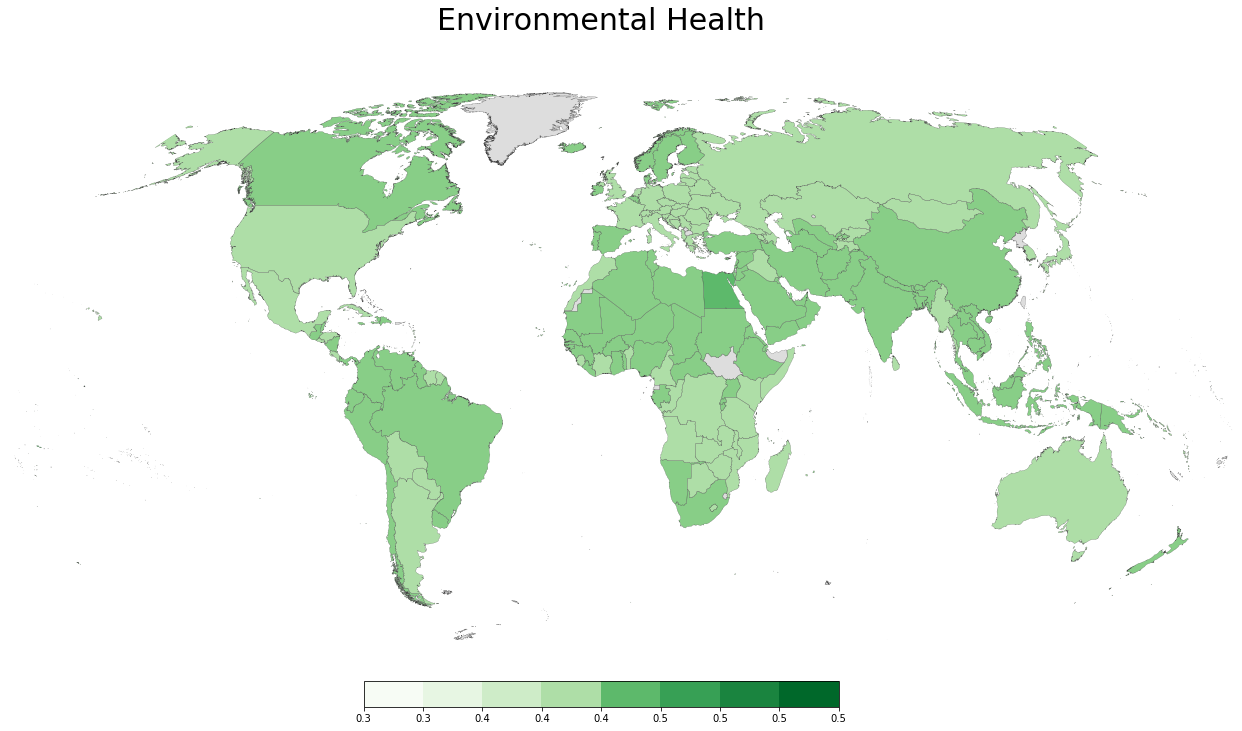

In [19]:
fig = plt.figure(figsize=(22, 12))

ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.suptitle(area2, fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in merged_data.index:
        color = '#dddddd'
    else:
        color = scheme[merged_data.loc[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
#plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')
plt.savefig('education_map.png')

